In [244]:
!pip install wordcloud

In [245]:
!pip install missingno

In [246]:
# # 그래프에서 한글표현을 위해 폰트를 설치합니다.
# %config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
# import matplotlib.font_manager as fm
# fontpath = 'C:/Windows/fonts/truetype/nanum/MaruBuri-Regular.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)

지정된 경로를 찾을 수 없습니다.


In [325]:
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# path = 'C:/Windows/Fonts/MaruBuri-Regular.ttf'
# font_name = fm.FontProperties(fname=path, size=9).get_name()
# mpl.rc('font', family=font_name)
# fm._rebuild()

In [363]:
import matplotlib as plt
import matplotlib.font_manager as fm

fontpath = 'C:/Windows/Fonts/MaruBuri-Regular.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)
fm._rebuild()


In [364]:
# 설치된 폰트가 뭐일까요
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [365]:
import pandas as pd
import numpy as np
import re

In [366]:

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS

In [379]:

df = pd.read_csv('raw.csv',encoding='utf-8')
# df = pd.read_csv("raw1", index_col="연번")
df.shape

(7738, 15)

In [380]:
df.isnull().sum()

소속부서1       21
구분        6822
집행목적         1
집행금액         0
대상인원         0
결제방법         0
집행목적.1    7126
집행지주소       33
집행지명        41
year        12
month        0
day          4
time         4
cnt          0
num          0
dtype: int64

In [381]:
df.head()

소속부서1   구분                   집행목적    집행금액     대상인원 결제방법 집행목적.1  \
0  감사위원회  NaN   코로나19 대응 방역체계 추진 간담회  120000  시장 외 3명   카드     시책   
1  감사위원회  NaN        코로나19 대응 관련 간담회  105000  시장 외 3명   카드     시책   
2  감사위원회  NaN  코로라19 지역방역 추진 관계자 간담회  120000  시장 외 3명   카드     시책   
3  감사위원회  NaN   광화문광장 조성현안관련 관계자 간담회  158000  시장 외 3명   카드     시책   
4  감사위원회  NaN     취임식 관련 시정 협력관련 간담회  120000  시장 외 3명   카드     기관   

                          집행지주소            집행지명    year  month   day   time  \
0               서울 중구 북창동 93-35             한가람  2021.0      4  10.0  12:12   
1                  서울 중구 무교로 16            동해수산  2021.0      4  12.0  13:05   
2                  서울 중구 무교로 16            동해수산  2021.0      4  15.0  19:52   
3                  서울 중구 무교로 16            동해수산  2021.0      4  19.0  19:49   
4  주)바닷가작은부엌 덕수궁점(서울 중구 덕수궁길 7,  (주)바닷가작은부엌덕수궁점  2021.0      4  22.0  20:32   

   cnt  num  
0    4    1  
1    4    1  
2    4    1  
3    4    1  
4    4    1

In [382]:
df.isnull().sum()

소속부서1       21
구분        6822
집행목적         1
집행금액         0
대상인원         0
결제방법         0
집행목적.1    7126
집행지주소       33
집행지명        41
year        12
month        0
day          4
time         4
cnt          0
num          0
dtype: int64

In [383]:
df_na = df[df['집행일시'].isna()]
df_na

KeyError: '집행일시'

In [384]:
print(df.shape)
df.drop(df_na.index[0], inplace=True)
df.shape

(7738, 15)


KeyError: "['해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'] not found in axis"

In [385]:
print(df.shape)
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day
df['시'] = df['집행일시'].dt.hour
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
print(df.shape)

(7738, 15)


KeyError: '집행일시'

In [386]:
df.head()

소속부서1   구분                   집행목적    집행금액     대상인원 결제방법 집행목적.1  \
0  감사위원회  NaN   코로나19 대응 방역체계 추진 간담회  120000  시장 외 3명   카드     시책   
1  감사위원회  NaN        코로나19 대응 관련 간담회  105000  시장 외 3명   카드     시책   
2  감사위원회  NaN  코로라19 지역방역 추진 관계자 간담회  120000  시장 외 3명   카드     시책   
3  감사위원회  NaN   광화문광장 조성현안관련 관계자 간담회  158000  시장 외 3명   카드     시책   
4  감사위원회  NaN     취임식 관련 시정 협력관련 간담회  120000  시장 외 3명   카드     기관   

                          집행지주소            집행지명    year  month   day   time  \
0               서울 중구 북창동 93-35             한가람  2021.0      4  10.0  12:12   
1                  서울 중구 무교로 16            동해수산  2021.0      4  12.0  13:05   
2                  서울 중구 무교로 16            동해수산  2021.0      4  15.0  19:52   
3                  서울 중구 무교로 16            동해수산  2021.0      4  19.0  19:49   
4  주)바닷가작은부엌 덕수궁점(서울 중구 덕수궁길 7,  (주)바닷가작은부엌덕수궁점  2021.0      4  22.0  20:32   

   cnt  num  
0    4    1  
1    4    1  
2    4    1  
3    4    1  
4    4    1

In [387]:
sns.countplot(data=df, x='연')


ValueError: Could not interpret input '연'

In [388]:
sns.countplot(data=df, x='월')

ValueError: Could not interpret input '월'

In [389]:
sns.countplot(data=df, x='연월')

ValueError: Could not interpret input '연월'

<AxesSubplot:xlabel='일', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


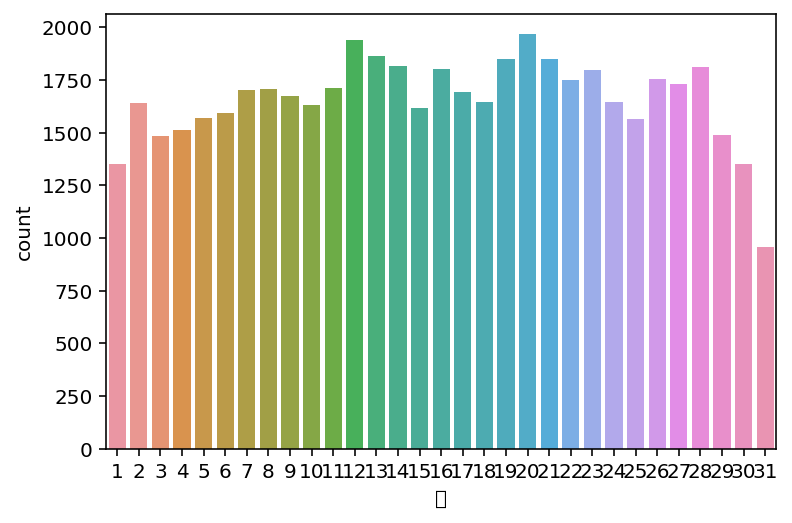

In [340]:
sns.countplot(data=df, x='일')

<AxesSubplot:xlabel='시', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


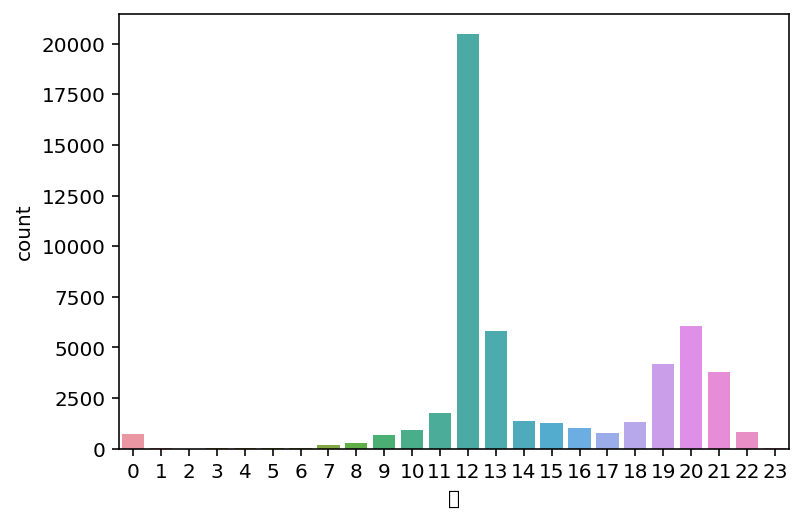

In [341]:
sns.countplot(data=df, x='시')

In [342]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}

In [343]:
df["요일_한글"] = df["요일"].apply(lambda x : weekday_map[x])
df["요일_한글"].head()

연번
1    금
2    화
3    월
4    금
5    금
Name: 요일_한글, dtype: object

<AxesSubplot:xlabel='요일_한글', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from c

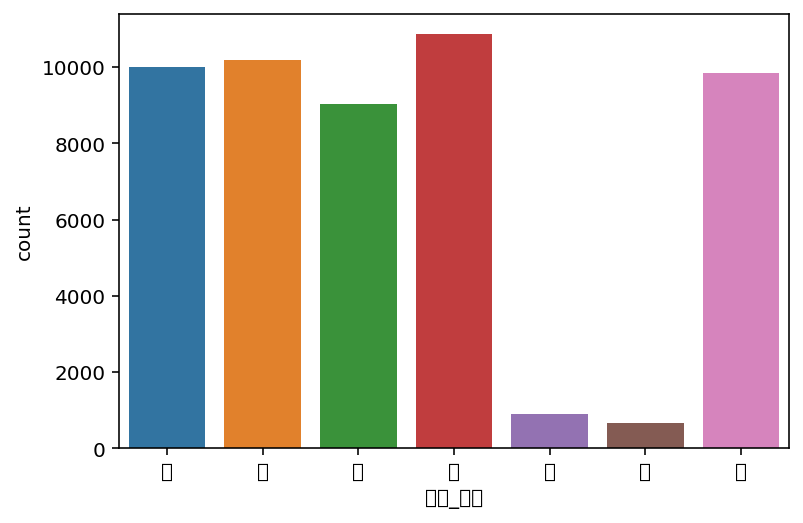

In [344]:
sns.countplot(data=df, x='요일_한글')

In [345]:
df.head()

1소속부서 결제방법           구분            대상인원      부서명      집행금액  \
연번                                                                
1   서울특별시장   카드  시정 관련 간담회 등        시장 등 12명  행정국 총무과  344000.0   
2   서울특별시장   카드  시정 관련 간담회 등  시장, 청년단체 등 38명  행정국 총무과  450000.0   
3   서울특별시장   카드  시정 관련 간담회 등         시장 등 8명  행정국 총무과  226000.0   
4   서울특별시장   카드  시정 관련 간담회 등        시장 등 11명  행정국 총무과  324500.0   
5   서울특별시장   카드  시정 관련 간담회 등        시장 등 25명  행정국 총무과  737500.0   

                        집행목적                집행일시                     집행장소  \
연번                                                                          
1             시정 정책추진 자문 간담회 2018-01-19 20:41:00    동신참치양재직(서초구 강남대로 213)   
2          시정 청년 정책 의견수렴 간담회 2018-01-23 19:06:00  서울시청구내식당 ( 중구 세종대로 110)   
3   시정 주요 경제정책 현안추진 의견수렴 간담회 2018-01-29 20:13:00             한뫼촌(종로구 북촌로)   
4             시정종교계 의견수렴 간담회 2018-01-12 09:09:00    서울시청구내식당(중구 세종대로 110)   
5          시정 정책 추진 의견수렴 간담회 2018-01-12 09:10:00    서울시청구내식당(중구 세종대로 110)   

       연  월      연월   일   시  요일 요일_한글  
연번                                     
1   2018  1  2018-1  19  20   4     금  
2   2018  1  2018-1  23  19   1     화  
3   2018  1  2018-1  29  20   0     월  
4   2018  1  2018-1  12   9   4     금  
5   2018  1  2018-1  12   9   4     금

In [346]:
df['집행목적'] = df['집행목적'].fillna('')

In [347]:
spend_gubun = ' '.join(df['집행목적'])
spend_gubun[:100]

'시정 정책추진 자문 간담회 시정 청년 정책 의견수렴 간담회 시정 주요 경제정책 현안추진 의견수렴 간담회 시정종교계 의견수렴 간담회 시정 정책 추진 의견수렴 간담회 시정 정책 추진 '

In [348]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

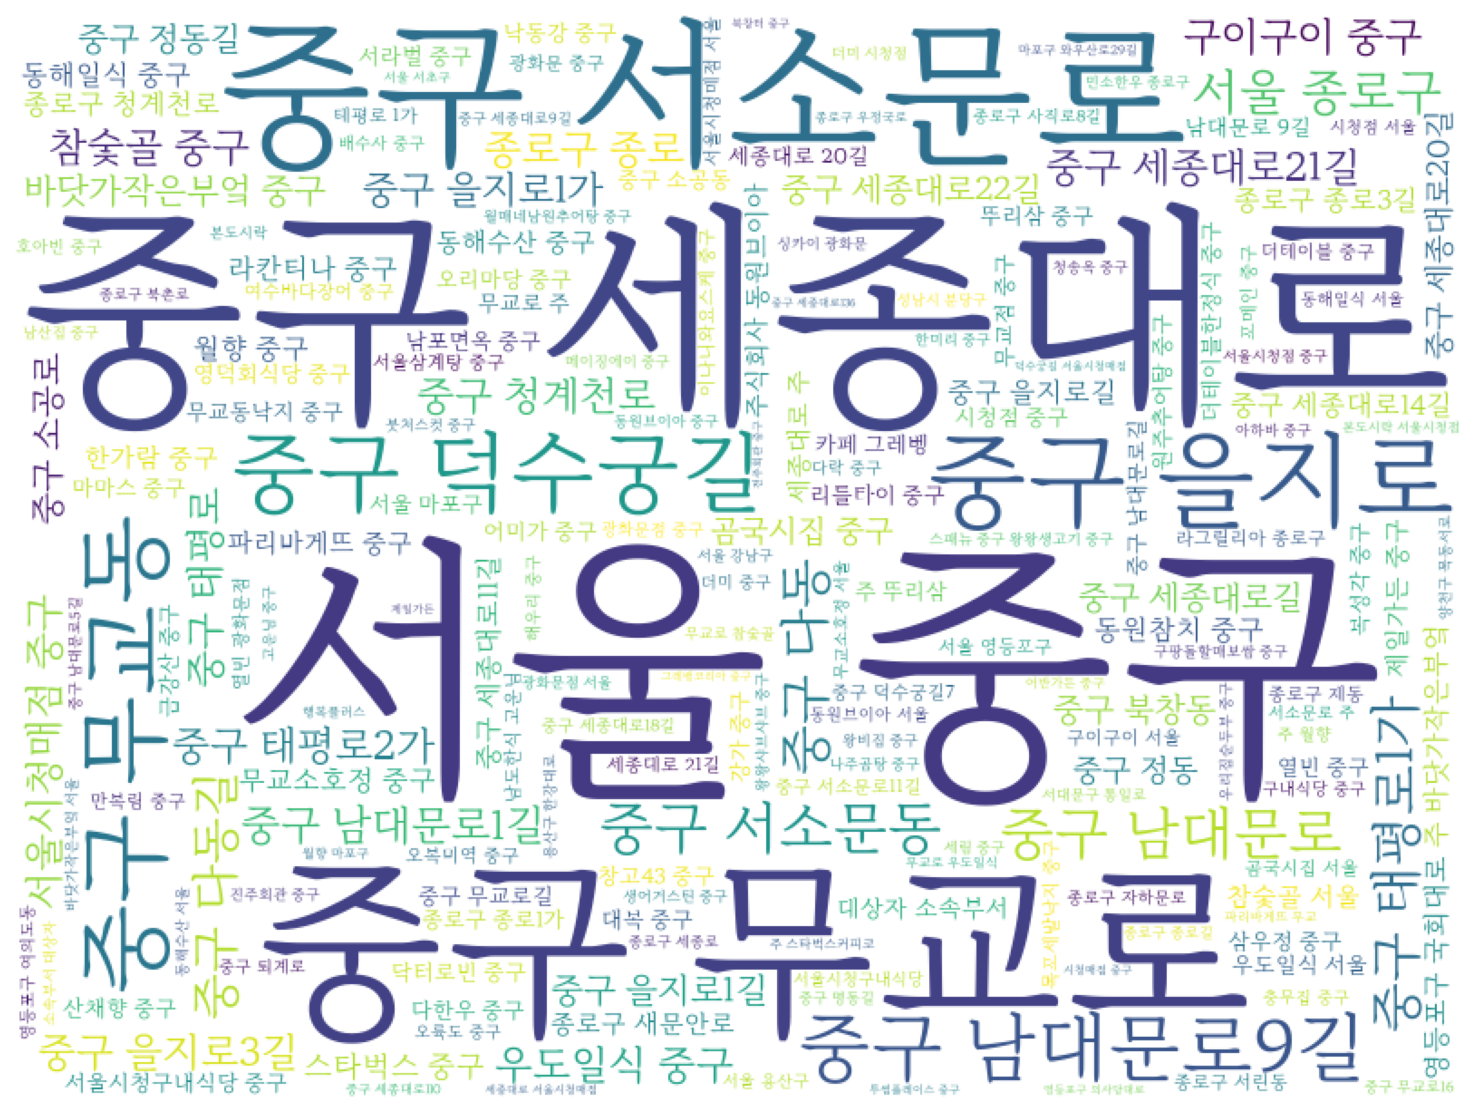

In [349]:
# 워드클라우드로 전처리할 텍스트를 살펴본다.
displayWordCloud(" ".join(df["집행장소"].fillna('')))

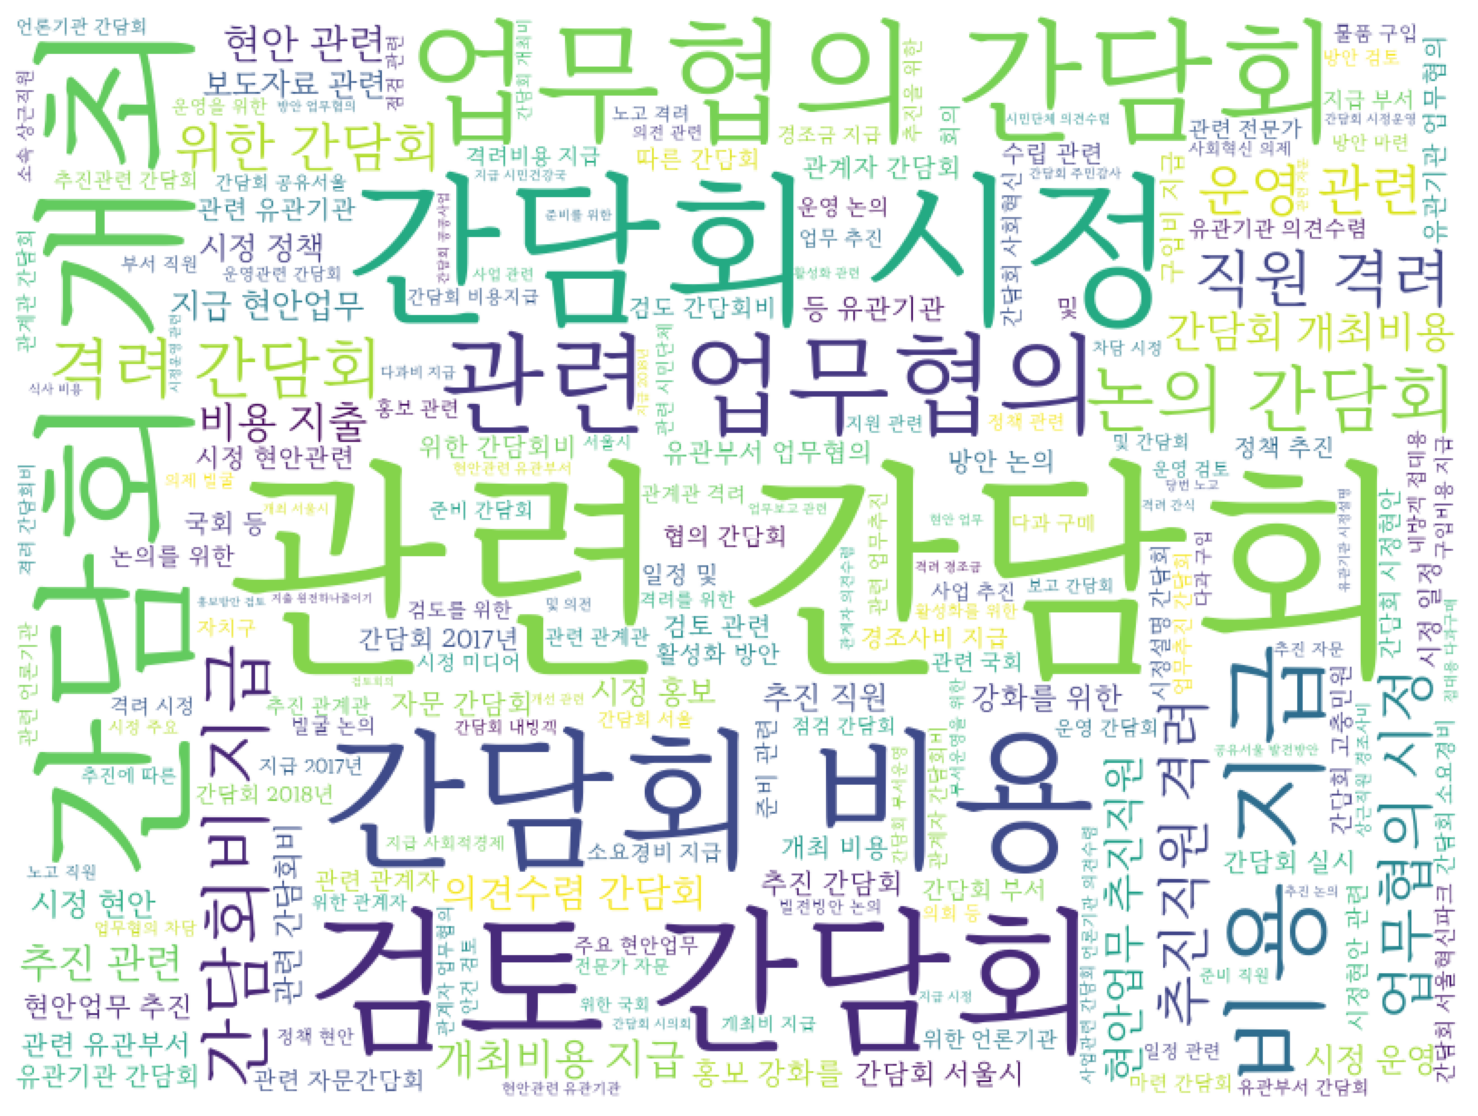

In [350]:
# 워드클라우드로 전처리할 텍스트를 살펴본다.
displayWordCloud(" ".join(df["집행목적"].fillna('')))

In [351]:
df['집행장소'].value_counts()

-                              522
대상자 소속부서                       199
서울시청구내식당                       134
서울시청매점 (중구 덕수궁길)               110
참숯골(중구 무교로 16)                 110
                              ... 
우도일식 (중구태평로1가)                   1
주식회사　육전식당 서울 동대문구 난계로30길 16      1
르브런쉭(영등포구 국제금융로)                 1
우도일식 중구 태평로 1가                   1
파리바게뜨(중구 남대문로9길 40, 김은옥)         1
Name: 집행장소, Length: 20251, dtype: int64

In [352]:
# 상호명이 여는 괄호 앞쪽에 있는 것들이 있다.
# 여는 괄호 앞에 있는 곳을 상호명으로 하자.
df['집행장소'] = df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x : x.split('(')[0].strip())
# 서울|중구|종로구 뒤에 공백이 있으면 주소라고 가정한다.
df['상호명'] = df['상호명'].apply(lambda x : x.split('서울 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('중구 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('종로구 ')[0].strip())

In [353]:
df_shop = df.loc[ (df['상호명'] != '-') & (df['상호명'] != '')  & (df['상호명'] != '대상자 소속부서') ]

print(df.shape)
print(df_shop.shape)

(51455, 17)
(50428, 17)


In [354]:
df_shop['상호명'].value_counts().head(30)

참숯골           806
우도일식          759
서울시청매점        718
구이구이          658
곰국시집          518
서울시청구내식당      429
동해일식          405
무교소호정         393
동해수산          359
스타벅스          322
바닷가작은부엌       320
라칸티나          318
한가람           317
동원참치          308
더테이블한정식       306
제일가든          288
어미가           281
삼우정           280
오리마당          266
파리바게뜨         261
월향            257
복성각           257
남포면옥          235
열빈            233
무교동낙지         230
포메인           226
（주）바닷가작은부엌    223
마마스           219
서라벌           207
오복미역          206
Name: 상호명, dtype: int64

In [355]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', "상호명"] = "바닷가작은부엌"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [356]:
top_50 = df_shop['상호명'].value_counts().head(50)
top_50 = pd.DataFrame(top_50).reset_index()
top_50.columns = ['상호명', '횟수']
top_50

상호명   횟수
0          참숯골  806
1         우도일식  759
2       서울시청매점  718
3         구이구이  658
4      바닷가작은부엌  543
5         곰국시집  518
6     서울시청구내식당  429
7         동해일식  405
8        무교소호정  393
9         동해수산  359
10        스타벅스  322
11        라칸티나  318
12         한가람  317
13        동원참치  308
14     더테이블한정식  306
15        제일가든  288
16         어미가  281
17         삼우정  280
18        오리마당  266
19       파리바게뜨  261
20         복성각  257
21          월향  257
22        남포면옥  235
23          열빈  233
24       무교동낙지  230
25         포메인  226
26         마마스  219
27         서라벌  207
28        오복미역  206
29        창고43  204
30         낙동강  204
31         금강산  203
32          대복  194
33  주식회사　동원브이아  193
34      목포세발낙지  188
35       영덕회식당  182
36         산채향  182
37      여수바다장어  177
38      왕왕샤브샤브  174
39         만복림  173
40       원주추어탕  173
41     서울시청신매점  172
42        닥터로빈  171
43       서울삼계탕  168
44         배수사  167
45          강가  159
46       라그릴리아  153
47         충무집  152
48     이나니와요스케  148
49         호아빈  145

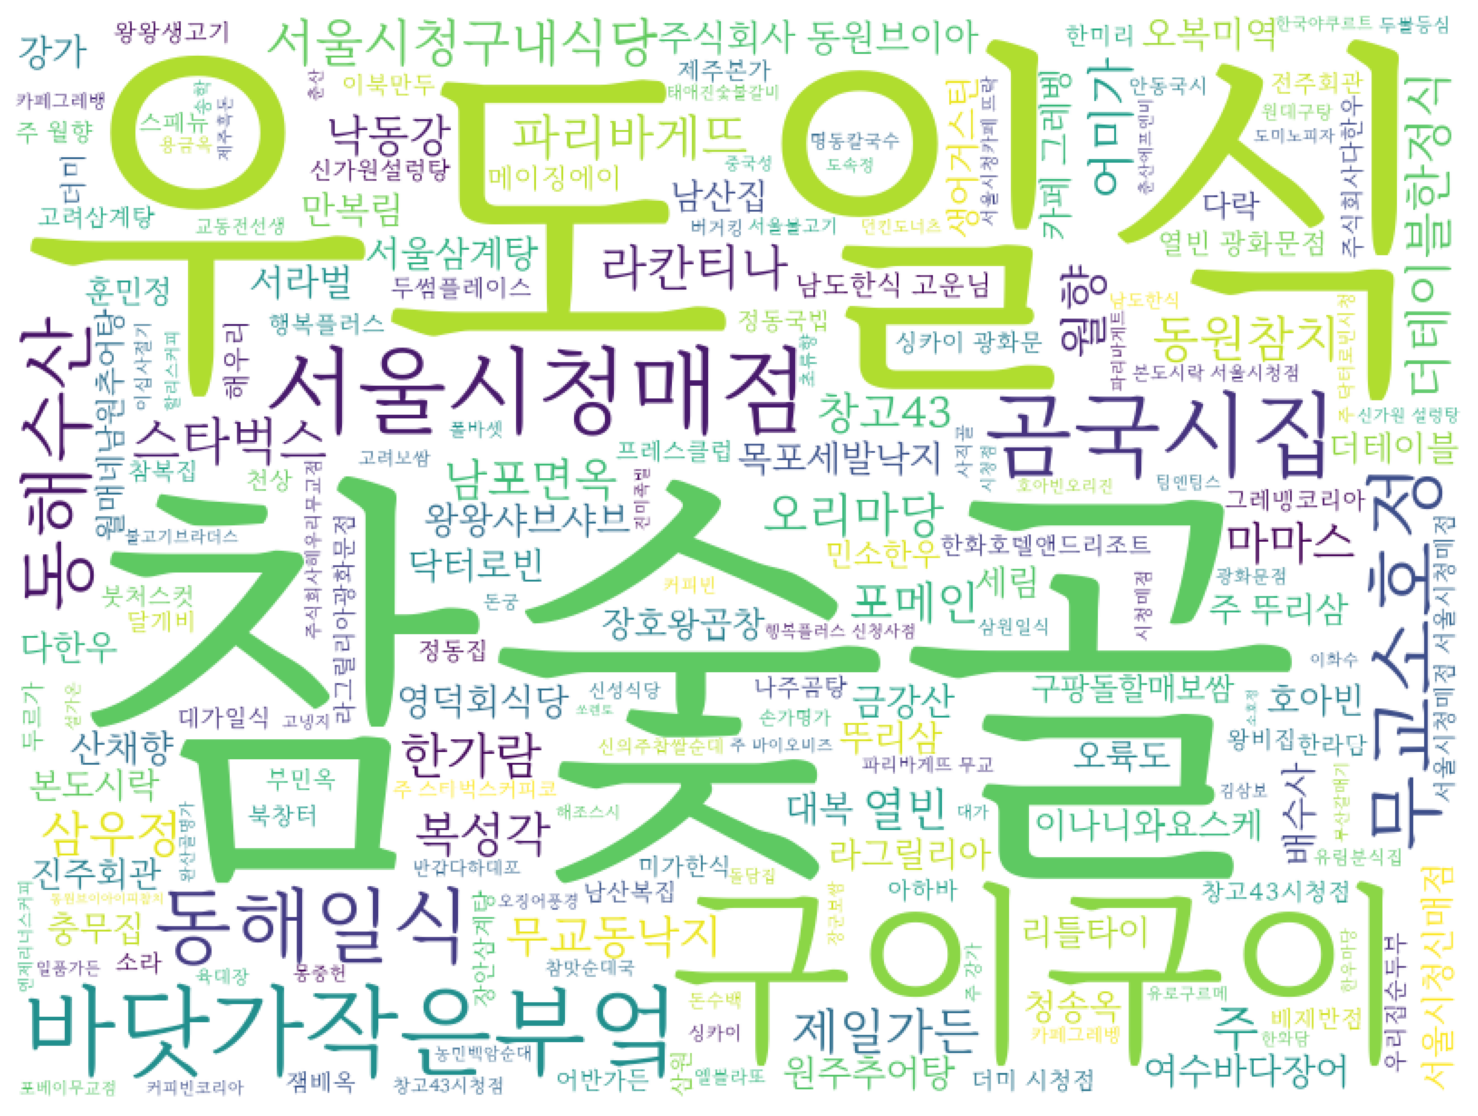

In [357]:
displayWordCloud(' '.join(df_shop['상호명']))